In [1]:
# importing Operating System

import os
os.getcwd()
print('os is imported')


os is imported


In [2]:
# Importing Python - Preprocessing - Data Manipulation - Data Modelling Libraries

# !pip install rake_nltk                                          # Rake_natural_language_took_kit

import pandas as pd                                               # python lib for Data Preprocessing
import numpy as np                                                # python lib for numerical Computations and else
import time                                                       # Records time stamps
import seaborn as sns                                             # Data Visuilization package for interpreting the data into Graphs , charts , etc
import matplotlib.pyplot as plt                                   # Data Visuilization package for interpreting the data into Graphs , charts , etc
from sklearn.metrics.pairwise import cosine_similarity            # similarity function that calucluate the similarity between two vectors etc
from sklearn.feature_extraction.text import CountVectorizer       # convert text to vector form  
from rake_nltk import Rake                                        # Discard stop words from the given data   
%matplotlib inline                                                  

import warnings                                                   # importing warnings library
warnings.filterwarnings('ignore')                                 # compress un-necessary warnings
print('Imported')                                                 # print for verification   

Imported


In [3]:
df1 = pd.read_csv('./IMDB_movies.csv')                            # Loading the "IMDB_movies.csv" and assigned it to df1 as dataframe1
df2 = pd.read_csv('./IMDB_ratings.csv')                           # Loading the "IMDB_ratings.csv" and assigned it to df2 as dataframe2
df3 = pd.read_csv('./NETFLIX TITLES.csv')                         # Loading the "NETFLIX TITLES.csv" and assigned it to df3 as dataframe3

In [4]:
# Viewing the Features in the IMDB_movies , IMDB_ratings , NETFLIX TITLES   

print( 'The Features in IMDB_movies are below'  , '\n', df1.columns) , print('\n')
print( 'The Features in IMDB_ratings are below'  , '\n', df2.columns) ,print('\n')
print( 'The Features in NETFLIX TITLES are below'  , '\n', df3.columns)


The Features in IMDB_movies are below 
 Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')


The Features in IMDB_ratings are below 
 Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',

In [5]:
# Shape of the dataframes

print('shape of IMDB_movies is :' , df1.shape)
print('shape of IMDB_ratings is :' , df2.shape)
print('shape of NETFLIX TITLES is :' , df3.shape)

shape of IMDB_movies is : (59164, 22)
shape of IMDB_ratings is : (60954, 49)
shape of NETFLIX TITLES is : (4675, 12)


In [6]:
print('\n' , 'Missing values in df3 are' , '\n' ,  df3.isnull().sum()) # viewing the null values in the dataframe


 Missing values in df3 are 
 show_id            0
type               0
title              0
director        1443
cast             439
country          349
date_added         6
release_year       0
rating             8
duration           0
listed_in          0
description        0
dtype: int64


In [7]:
# Null-Value Imputation

df3.director.fillna("No Director Name" ,      inplace = True)  # filling null values with no-director name
df3.cast.fillna('No cast Given' ,             inplace = True)  # filling null values with no cast give
df3.country.fillna("No country given" ,       inplace  = True) # filling null values with no country given
df3.dropna(subset=['date_added' , 'rating' ] ,inplace  = True) # dropping null values from the dataframe

In [8]:
df3.isnull().sum()                   # Checking for Null - values after Imputation

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df3[['country']].head(10)          # country feature is a factor type and viewing the top records of the feature

,country
0,United States
1,"India, Japan"
2,United States
3,India
4,"United States, United Kingdom"
5,"United States, Canada, France"
6,United States
7,Indonesia
9,United States
10,United States


# 1 . Which country creates highest content on netflix?

Text(0.5, 1.0, 'Highest Content in Netflix')

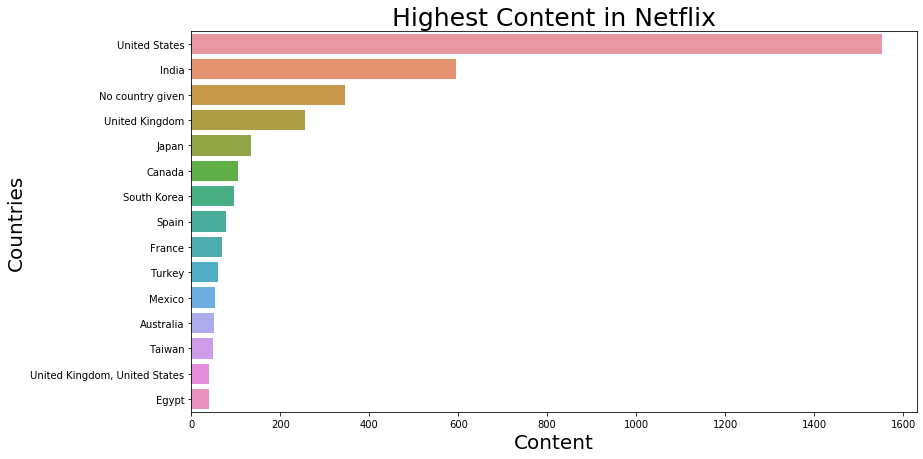

In [10]:
# Creating a subset called countries to analze the details of highest conent creation on Netflix

countries = df3.set_index('title').country.str.split(",  " , expand  = True ).stack().reset_index(level = 1  , drop  = True)

# Replacing with country not available if country is not assigned

countries = countries[countries != 'country not available']

# Plotting figure for Visuilization

plt.figure(figsize = (13, 7))                                                   # creating figure size for the created plot   
sns.countplot(y = countries ,  order = countries.value_counts().index[ : 15])   # using the countplot creating a horizantal barchart for the top 15 countries
plt.ylabel('Countries' , fontsize = 20)                                         # plotting ylabel for the chart
plt.xlabel('Content', fontsize = 20)                                            # plotting xlabel for the chart
plt.title('Highest Content in Netflix' , fontsize = 25)                         # plotting title for the chart


### United States creates highest content on netflix

#   2. Producer wants to release some content, which month must he do so?
#    Month when least amount of content is added?


In [11]:
# viewing the date format of the content added in netflix
# we need to seperate the Month and year 

df3[['date_added']].head(1)   

,date_added
0,"April 19, 2019"


In [12]:
# splitting the year using split applied over all rows using lambda functin
df3['year']  = df3['date_added'].apply(lambda  x : x.split(',')[-1])  

# splitting the month using split applied over all rows using lambda functin
df3['month'] = df3['date_added'].apply(lambda  x : x.lstrip().split(' ')[0]) 


In [13]:
# Date is modied into year and Month 
# Now it is easy for analyzing monthly

df3[['date_added' , 'year' , 'month']].head(1)

,date_added,year,month
0,"April 19, 2019",2019,April


In [14]:
# created an array of month 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a new dataframe by grouping the year and month
df4 = np.transpose(df3.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order])

In [15]:
# Viewing the Dataframe
df4.head(12)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,37.0,60.0,106.0,126.0,125.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,13.0,70.0,66.0,138.0,0.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,12.0,113.0,131.0,148.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,18.0,80.0,103.0,136.0,0.0
May,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,8.0,92.0,73.0,140.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,11.0,71.0,63.0,143.0,0.0
July,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,24.0,64.0,118.0,124.0,0.0
August,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,32.0,92.0,114.0,124.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,37.0,90.0,99.0,121.0,0.0


Text(0.5, 1, ' Best Month to Release New Content')

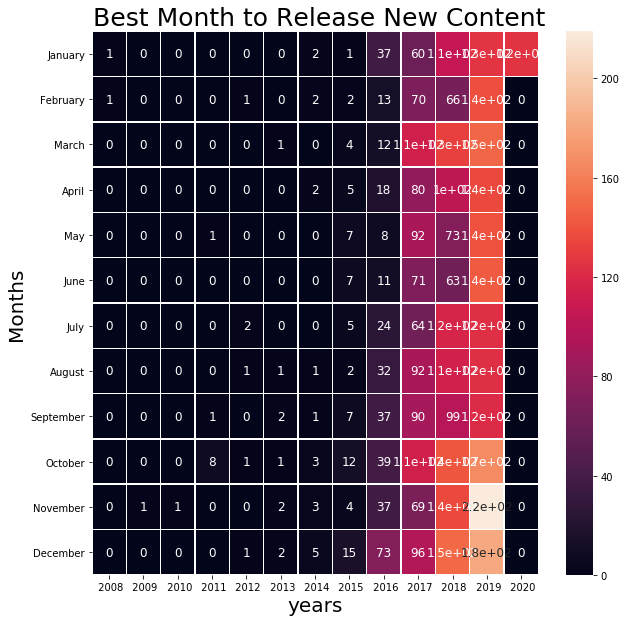

In [16]:
# Creating a Heat Map Visuilization for the new dataframe created by groupby
 
fig, ax = plt.subplots(figsize=(10 , 10))                                        # Creating figure size and subplots 
sns.heatmap(df4 , annot=True, linewidths=.5, ax=ax ,annot_kws={"size": 12})      # Applying heatmap function for the data and modified the **Kwargs
plt.ylabel('Months' , fontsize = 20)                                             # labelling the y-axis             
plt.xlabel('years', fontsize = 20)                                               # labelling the X-axis
plt.title(' Best Month to Release New Content' , fontsize = 25)                  # labelling the title

### In 2020  February, March, April, May, June, July, August, September, October, November,December  are good months to release content
### In 2019  January ,  July , August , September are good months to release content

## 3. Which tv series has the highest number of seasons?

                       title  duration
936           Grey's Anatomy        15
3378                    NCIS        15
3732            Supernatural        14
4624  COMEDIANS of the world        13
741        Trailer Park Boys        12


Text(0.5, 1.0, 'TV Series vs Number of seasons')

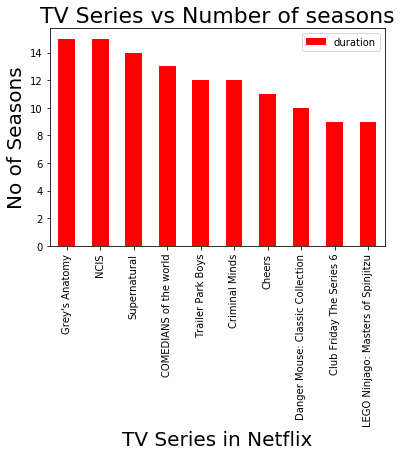

In [17]:
# creating a subset dataframe df5 by usig loc function with  'TV Show' , 'duration' , 'title'
df5 =  df3.loc[(df3.type == 'TV Show') & (df3['duration'] ) & (df3['title'] )]

# we need the coluumn to be numeric and cleaing the text attached to the integers
df5['duration'] = df5['duration'].str.replace('Season' , '')

# convering the string into integer using to_numeric function
df5['duration'] = pd.to_numeric((df5['duration'].str.replace('s' , '')))

# created an array with 2 column feature names
columns = ['title' , 'duration']

# creating a subset dataframe from columns array
df6  = df5[columns]

# sorting the datafame by the feature 'duration' in decreasing order 
df6 = df6.sort_values(['duration'] , ascending = False)

# Now the dataframe was once again done subset of 10 observations to meet a nice-lookig barchart
df6 = df6[0:10]

# Printing the top 5 series with Maximum Seasons
print(df6.head(5))

# Plotting the data using basic plot function
df6.plot(x = 'title' , y = 'duration' , kind = 'bar' , color = 'r')      # Assigning the X and Y values , for the type barchart
plt.ylabel('No of Seasons' , fontsize = 20)                              # labelling y-axis for the chart
plt.xlabel('TV Series in Netflix', fontsize = 20)                        # labelling x-axis for the chart
plt.title('TV Series vs Number of seasons' , fontsize = 22)              # labelling main title for the chart

### Grey's Anatomy and NCIS both having highest number of 15 seasons

# 4.Top rated movie that has ratings on imdb and is available on netflix? 
# *Note : Use imdb Ratings dataset, imdb movies dataset and Netflix dataset*


####  Datasets are already loaded initially and taking only few required paremeters
####  4 major features 
*  Title 
* Release Year 
* Rating 
* Genre

In [18]:
# create a subset dataframe consists of the above mentioned features 
df7 = pd.DataFrame({'Title':df1.title, 'Release Year':df1.year, 'Rating': df2.weighted_average_vote, 'Genre':df1.genre})

# Dropping duplicate or replicate values as features are taken from multiple dataframes i.e checking for uniqueness
df7.drop_duplicates(subset=['Title','Release Year','Rating' , 'Genre'], inplace=True)

In [19]:
# checking for Null-Values
df7.isnull().sum()

Title           76
Release Year    76
Rating           0
Genre           76
dtype: int64

In [20]:
# Dropping null values 
df7.dropna(inplace=True)

In [21]:
# checking for Null-Values
df7.isnull().sum()

Title           0
Release Year    0
Rating          0
Genre           0
dtype: int64

In [22]:
#  Mergeing the subset dataframe (df7+df3 = df8) and created another subset dataframe
# Merged using inner join on the column 'Title'
df8   =  df7.merge(df3, left_on='Title',right_on='title',how='inner')

In [23]:
# sorting the dataframe as it is easy to know top rated movie ratings 
df8    =  df8.sort_values(['Rating'], ascending=False)

# once again accessing top ten observations 
df9 = df8[:10]
df9['Title'].head(10)

1034     Oththa Seruppu Size 7
1402          Schindler's List
638      Merku Thodarchi Malai
236                  Inception
102               The Irishman
431     Eh Janam Tumhare Lekhe
141                    Koshish
1077                    Masoom
595                      Manto
691                     Qismat
Name: Title, dtype: object

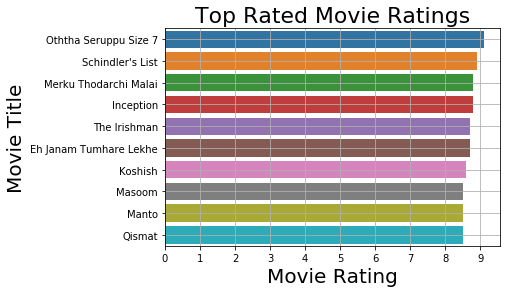

In [24]:
# Plotting the Data using 'Barplot-H' 

sns.barplot(y= 'title' , x = 'Rating' , data = df9 )         # passing the X , Y and Data into the arguments of the Barplot function
plt.ylabel('Movie Title' , fontsize = 20)                    # labelling y-axis in the chart
plt.xlabel('Movie Rating', fontsize = 20)                    # labelling x-axis in the chart
plt.title('Top Rated Movie Ratings' , fontsize = 22 )        # labelling Main-Title in the chart
plt.xticks(np.arange(0, 10))                                 # modifying x-ticks from 0-10
plt.grid()                                                   # Inserting grid to the chart

### Top Rated Movies in Netflix are
*     Oththa Seruppu Size 7
*          Schindler's List
*       Merku Thodarchi Malai
*                  Inception
*                The Irishman
*     Eh Janam Tumhare Lekhe
*                     Koshish
*                     Masoom
*                       Manto
*                      Qismat

# 5 Name the country that has the second highest rated content?
# *Note : Use imdb Ratings dataset, imdb movies dataset and Netflix dataset*

Text(0.5, 1.0, 'Top Content Creators')

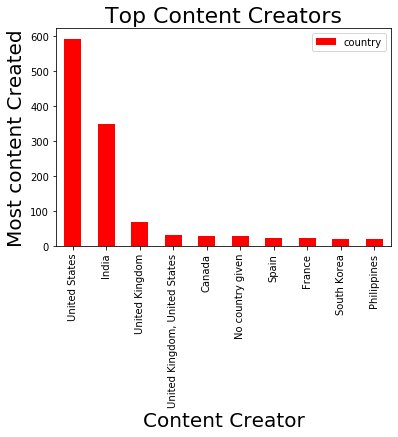

In [25]:
#  Creating a new subset by country 
df10 = df8['country'].value_counts().sort_values(ascending  = False)

# converting the series into DataFrame
df10 = pd.DataFrame(df10)

# Accessing the top 10 observations
df11 = df10[:10] 

#Reset the index of the dataframe
df11.reset_index(level = 0 , inplace = True)

# Plotting the Data using Plot Functon
df11.plot(x = 'index' , y = 'country' , kind = 'bar' , color  = 'r')   # passing the X , Y and Data into the arguments of the plot function 
plt.ylabel('Most content Created' , fontsize = 20)                     # labelling y-axis in the chart
plt.xlabel('Content Creator', fontsize = 20)                           # labelling x-axis in the chart            
plt.title('Top Content Creators' , fontsize = 22 )                     # labelling Main-Title in the chart

### India is the country that has the second highest rated content

# 6. Build a content based movie recommender system with natural language processing.
# The function should take movie name as input and should return top 3 recommended movies

In [26]:
# Reading the Dataframe NETFLIX TITLES
df12  = pd.read_csv('./NETFLIX TITLES.csv' )

In [27]:
# Checking for null values
df12.isnull().sum()

show_id            0
type               0
title              0
director        1443
cast             439
country          349
date_added         6
release_year       0
rating             8
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
# filling the null values with strings 
df12 = df12.fillna("")
df12.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [29]:
# subsetting the 4 useful Columns 
df13  = df12[['title' ,  'director' , 'cast' , 'description']]
df13.head(5)

,title,director,cast,description
0,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,A look at how a world-renowned medical institu...
1,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...",Four individuals in modern India grapple with ...
2,Love Jones,Theodore Witcher,"Larenz Tate, Nia Long, Isaiah Washington, Lisa...","In this urban romantic comedy set in Chicago, ..."
3,Ghayal,Rajkumar Santoshi,"Sunny Deol, Meenakshi Sheshadri, Amrish Puri, ...","Framed for his older brother's murder, a boxer..."
4,Marriage Story,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...",Academy Award-nominated filmmaker Noah Baumbac...


In [30]:
df13['description'] = df13['description'].str.replace('[^\w\s]','')

In [31]:
# Extract Keywords from the columns

df13['key_words']  = " "                                         # initilize new columns called Key_words
r = Rake()                                                       # use Rake to discard stop words (based on english stopwords from NLTK , Stanford reference)

for index , row in df13.iterrows():                             #  looping over index  and rows
    r.extract_keywords_from_text(row['description'])            #  extract key words from description of the content 
    key_words_dict_scores  = r.get_word_degrees()               #  dictionary with key words and their scores
    row['key_words']  = list(key_words_dict_scores.keys())      #  assigning list of key words to new column

df13.head(5)

,title,director,cast,description,key_words
0,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,A look at how a worldrenowned medical institut...,"[adapted, look, healthcares, evolving, demands..."
1,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...",Four individuals in modern India grapple with ...,"[modern, india, grapple, identities, amid, soc..."
2,Love Jones,Theodore Witcher,"Larenz Tate, Nia Long, Isaiah Washington, Lisa...",In this urban romantic comedy set in Chicago t...,"[urban, romantic, comedy, set, courtship, play..."
3,Ghayal,Rajkumar Santoshi,"Sunny Deol, Meenakshi Sheshadri, Amrish Puri, ...",Framed for his older brothers murder a boxer s...,"[boxer, seeks, violent, revenge, family, apart..."
4,Marriage Story,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...",Academy Awardnominated filmmaker Noah Baumbach...,"[family, staying, together, academy, awardnomi..."


In [32]:
# Extract the words from the director columnn into a list

df13['director']  = df13['director'].map(lambda x: x.split(','))

# Extract the crew names from the cast columnn into a list
df13['cast']      = df13['cast'].map(lambda x: x.split(','))

for index, row in df13.iterrows():                                                # Looping over the index and rows 
    row['director'] = [x.lower().replace(' ','') for x in row['director']]        # convert to lowercase
    row['cast']     = [x.lower().replace(' ','') for x in row['cast']]            # convert to lowercase

    
df13.head(5)

,title,director,cast,description,key_words
0,The Mayo Clinic,"[kenburns, christopherlorenewers, erikewers]",[petercoyote],A look at how a worldrenowned medical institut...,"[adapted, look, healthcares, evolving, demands..."
1,I Am,[onir],"[juhichawla, rahulbose, nanditadas, sanjaysuri...",Four individuals in modern India grapple with ...,"[modern, india, grapple, identities, amid, soc..."
2,Love Jones,[theodorewitcher],"[larenztate, nialong, isaiahwashington, lisani...",In this urban romantic comedy set in Chicago t...,"[urban, romantic, comedy, set, courtship, play..."
3,Ghayal,[rajkumarsantoshi],"[sunnydeol, meenakshisheshadri, amrishpuri, mo...",Framed for his older brothers murder a boxer s...,"[boxer, seeks, violent, revenge, family, apart..."
4,Marriage Story,[noahbaumbach],"[scarlettjohansson, adamdriver, lauradern, ala...",Academy Awardnominated filmmaker Noah Baumbach...,"[family, staying, together, academy, awardnomi..."


In [33]:
# combining column attributes to Bag_of_words

df13['bag of words'] = ""                                         # initilizing new column called Bag of words
columns  = [ 'director' , 'cast'  , 'key_words']                  # considering major columns

for index, row in df13.iterrows():                                # Looping over index and rows
    words = ''                                                    # words as string type
    for col in columns:                            
        words += ' '.join(row[col]) + ' '                         # adding column attributes 
    row['bag of words'] = words                                   # storing in columns
    
df14 = df13[['title','bag of words']]                             # creating DataFrame with Title and consolidated Attributes i.e bag of words
df14.head(5)

,title,bag of words
0,The Mayo Clinic,kenburns christopherlorenewers erikewers peter...
1,I Am,onir juhichawla rahulbose nanditadas sanjaysur...
2,Love Jones,theodorewitcher larenztate nialong isaiahwashi...
3,Ghayal,rajkumarsantoshi sunnydeol meenakshisheshadri ...
4,Marriage Story,noahbaumbach scarlettjohansson adamdriver laur...


In [34]:
# create vector representation for Bag_of_words
count = CountVectorizer()
count_matrix = count.fit_transform(df14['bag of words'])

In [35]:
#  generate the cosine similarity matrix 
# rows represent all movies; columns represent all movies
# cosine similarity: similarity = cos(angle) = range from 0 (different) to 1 (similar)
# all the numbers on the diagonal are 1 because every movie is identical to itself (cosine value is 1 means exactly identical)
# matrix is also symmetrical because the similarity between A and B is the same as the similarity between B and A.

cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.04082483,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04082483, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [36]:
# create a Series for movie titles which can be used as indices
indices = pd.Series(df14['title'])

In [37]:
# Recommendations function

def recommend(title , cosine_sim = cosine_sim):                            # creating recommend function with arguments
    recommend_movies = []                                                  # creating an Empty array
    idx = indices[indices == title].index[0]                               # Matching index with title
    ss  = pd.Series(cosine_sim[idx]).sort_values(ascending  = False)       # finding similarity score and sorting in ascending order
    max_indices = list(ss.iloc[1:4].index)                                 # three Recommendations are captured 
    
    for i in max_indices:                                                  # Looping over Indices to append  
        recommend_movies.append(list(df14['title'])[i])                    # capture recommendations are added into created array 
    return recommend_movies                                                # returns three recommendations

In [38]:
# using the recommend function and based on similarity these are the movies the model is recommedning

print(recommend('The Mayo Clinic'))
print(recommend('The Force'))
print(recommend('Sanju'))

['The Bleeding Edge', 'Westside vs. the World', 'End Game']
['The Bomb Squad', 'Making a Murderer', 'The Rebound']
['The House That Made Me', 'Bollywood Calling', 'Aitraaz']
